In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import bs4 as bs
import urllib.request

In [ ]:
!pip install tmdbv3api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Loading TMDB 5000 dataset (movie up to 2017)

In [ ]:
df_credits = pd.read_csv('/content/drive/MyDrive/General/myProjects/Movie Recommendation/data/tmdb_5000_credits.csv')

In [ ]:
df_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
df_movies = pd.read_csv('/content/drive/MyDrive/General/myProjects/Movie Recommendation/data/tmdb_5000_movies.csv')

In [ ]:
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
df_movies['release_date'][1]

'2007-05-19'

In [ ]:
df_movies['release_date'] = df_movies['release_date'].str[:4]

In [ ]:
df_movies.rename(columns = {'release_date':'release_year'}, inplace = True)

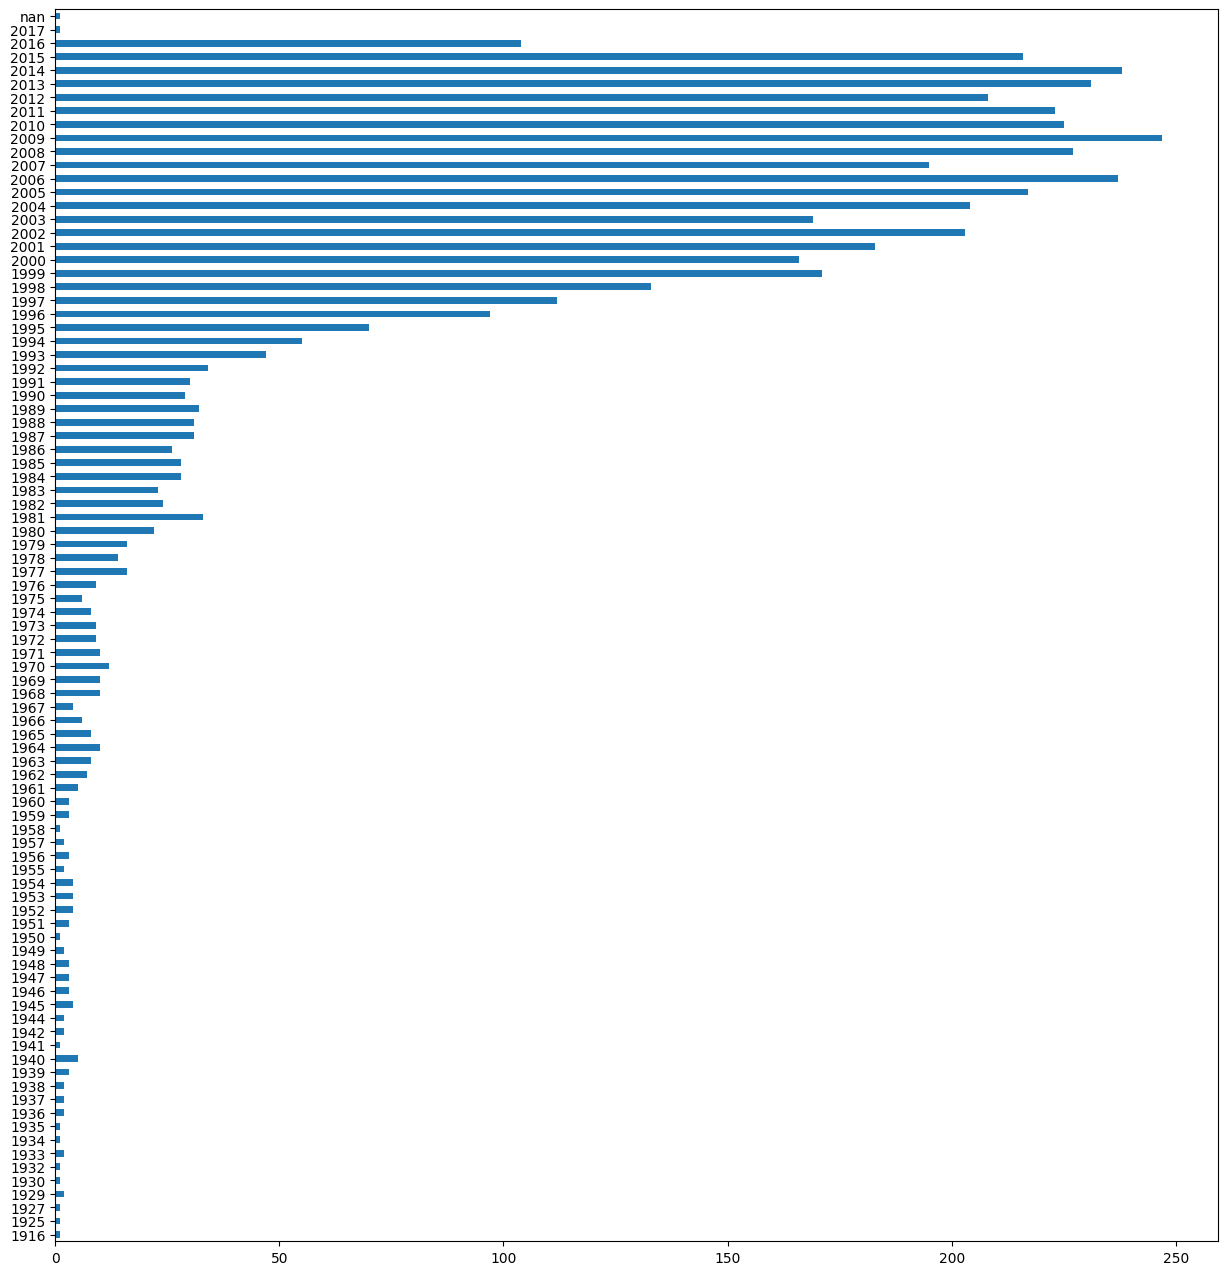

In [ ]:
df_movies.release_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

In [ ]:
df_credits.columns=['id', 'title', 'cast', 'crew']

In [ ]:
df_movies.drop(['title'], axis=1, inplace=True)

In [ ]:
# Merging two datasets on 'id'
df_movielens=pd.merge(df_credits,df_movies,on='id')

In [ ]:
df_movielens.columns

Index(['id', 'title', 'cast', 'crew', 'budget', 'genres', 'homepage',
       'keywords', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_year', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
df_movielens['genres']

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4798    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4799    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4800    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4801                                                   []
4802                  [{"id": 99, "name": "Documentary"}]
Name: genres, Length: 4803, dtype: object

In [ ]:
import ast

def get_value(row, value_to_get):
  dictionaries = ast.literal_eval(row)
  a = [d[value_to_get] for d in dictionaries]
  if not a:
    return ""
  else: return a[0]

In [ ]:
df_movielens['genres'] = df_movielens['genres'].apply(get_value, value_to_get= 'name')

In [ ]:
df_movie_data = df_movielens.loc[:,['title','release_year', 'genres', 'overview']]

In [ ]:
df_movie_data = df_movie_data[['title', 'overview', 'genres', 'release_year']]

In [ ]:
df_movie_data.head()

,title,overview,genres,release_year
0,Avatar,"In the 22nd century, a paraplegic Marine is di...",Action,2009
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",Adventure,2007
2,Spectre,A cryptic message from Bond’s past sends him o...,Action,2015
3,The Dark Knight Rises,Following the death of District Attorney Harve...,Action,2012
4,John Carter,"John Carter is a war-weary, former military ca...",Action,2012


In [ ]:
df_movie_data.shape

(4803, 4)

In [ ]:
df_movie_data.to_csv('/content/drive/MyDrive/General/myProjects/Movie Recommendation/data/data.csv',index=False)

# Loading 2018 movies from Wikipedia

In [ ]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2018"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [ ]:
df = pd.concat([df1, df2, df3, df4])

In [ ]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.
0,J A N U A R Y,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / S...,Adam Robitel (director); Leigh Whannell (scree...,[2],NaN
1,J A N U A R Y,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcl...,[3],NaN
2,J A N U A R Y,5,Stratton,Momentum Pictures / GFM Films,"Simon West (director); Duncan Falconer, Warren...",[4],NaN
3,J A N U A R Y,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, St...",[5],NaN
4,J A N U A R Y,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,Jaume Collet-Serra (director); Byron Willinger...,[6],NaN
...,...,...,...,...,...,...,...
62,D E C E M B E R,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions,Etan Cohen (director/screenplay); Will Ferrell...,NaN,[164]
63,D E C E M B E R,25,Vice,Annapurna Pictures / Plan B Entertainment,Adam McKay (director/screenplay); Christian Ba...,NaN,[137]
64,D E C E M B E R,25,On the Basis of Sex,Focus Features,Mimi Leder (director); Daniel Stiepleman (scre...,NaN,[230]
65,D E C E M B E R,25,Destroyer,Annapurna Pictures,"Karyn Kusama (director); Phil Hay, Matt Manfre...",NaN,[263]


In [ ]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = '9ea8e38793dc3a0b5cb72d7c8c581bda'

In [ ]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_overview(x):
  overview = []
  result = tmdb_movie.search(x)
  movie_id = result[0].id
  response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
  data_json = response.json()
  if data_json['overview']:
    genre_str = " " 
    for i in range(0,len(data_json['overview'])):
      overview.append(data_json['overview'][i])
    return genre_str.join(overview)
  else:
    np.NaN

In [ ]:
def get_genre(x):
  genres = []
  result = tmdb_movie.search(x)
  movie_id = result[0].id
  response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
  data_json = response.json()
  if data_json['genres']:
    genre_str = " " 
    for i in range(0,len(data_json['genres'])):
      genres.append(data_json['genres'][i]['name'])
      return genre_str.join(genres)
  else:
      np.NaN

In [ ]:
df['overview'] = df['Title'].map(lambda x: get_overview(str(x)))

In [ ]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

In [ ]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.,overview,genres
0,J A N U A R Y,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / S...,Adam Robitel (director); Leigh Whannell (scree...,[2],NaN,P a r a p s y c h o l o g i s t E l i s e ...,Horror
1,J A N U A R Y,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcl...,[3],NaN,M y s t e r i o u s e v e n t s s u r r o ...,Thriller
2,J A N U A R Y,5,Stratton,Momentum Pictures / GFM Films,"Simon West (director); Duncan Falconer, Warren...",[4],NaN,A B r i t i s h S p e c i a l B o a t ...,Action
3,J A N U A R Y,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, St...",[5],NaN,"I n 1 9 2 9 , a n A u s t r a l i a n ...",Western
4,J A N U A R Y,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,Jaume Collet-Serra (director); Byron Willinger...,[6],NaN,"A b u s i n e s s m a n , o n h i s d ...",Action
...,...,...,...,...,...,...,...,...,...
62,D E C E M B E R,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions,Etan Cohen (director/screenplay); Will Ferrell...,NaN,[164],D e t e c t i v e S h e r l o c k H o l m ...,Mystery
63,D E C E M B E R,25,Vice,Annapurna Pictures / Plan B Entertainment,Adam McKay (director/screenplay); Christian Ba...,NaN,[137],J u l i a n M i c h a e l s h a s d e s ...,Thriller
64,D E C E M B E R,25,On the Basis of Sex,Focus Features,Mimi Leder (director); Daniel Stiepleman (scre...,NaN,[230],Y o u n g l a w y e r R u t h B a d e r ...,Drama
65,D E C E M B E R,25,Destroyer,Annapurna Pictures,"Karyn Kusama (director); Phil Hay, Matt Manfre...",NaN,[263],W h e n E r i n B e l l w a s a y o ...,Thriller


In [ ]:
df_2018 = df[['Title', 'overview', 'genres']]

In [ ]:
df_2018['overview'] = df_2018['overview'].str.replace('   ', '@')
df_2018['overview'] = df_2018['overview'].str.replace(' ','')
df_2018['overview'] = df_2018['overview'].str.replace('@',' ')

<ipython-input-52-34e39a1bd5cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['overview'] = df_2018['overview'].str.replace('   ', '@')
<ipython-input-52-34e39a1bd5cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['overview'] = df_2018['overview'].str.replace(' ','')
<ipython-input-52-34e39a1bd5cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [ ]:
df_2018['release_year'] = 2018

<ipython-input-53-a51ff12f33c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['release_year'] = 2018


In [ ]:
df_2018.columns = ['title', 'overview', 'genres', 'release_year']

In [ ]:
df_2018.head()

,title,overview,genres,release_year
0,Insidious: The Last Key,Parapsychologist Elise Rainier and her team tr...,Horror,2018
1,The Strange Ones,Mysterious events surround the travels of two ...,Thriller,2018
2,Stratton,A British Special Boat Service commando tracks...,Action,2018
3,Sweet Country,"In 1929, an Australian Aboriginal stockman kil...",Western,2018
4,The Commuter,"A businessman, on his daily commute home, gets...",Action,2018


In [ ]:
df_2018.isna().sum()

title           0
overview        0
genres          0
release_year    0
dtype: int64

# Loading 2019 movies from Wikipedia

In [ ]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2019"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [ ]:
df = pd.concat([df1, df2, df3, df4])

In [ ]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,4,Escape Room,Columbia Pictures / Original Film,"Adam Robitel (director); Bragi F. Schut, Maria...",[2]
1,J A N U A R Y,4,Rust Creek,IFC Films / Lunacy Productions,Jen McGowan (director); Julie Lipson (screenpl...,[3]
2,J A N U A R Y,4,American Hangman,Hangman Justice Productions,Wilson Coneybeare (director/screenplay); Donal...,[4]
3,J A N U A R Y,11,A Dog's Way Home,Columbia Pictures,Charles Martin Smith (director); W. Bruce Came...,[5]
4,J A N U A R Y,11,The Upside,STX Entertainment,Neil Burger (director); Jon Hartmere (screenpl...,[6]
...,...,...,...,...,...,...
66,D E C E M B E R,25,Spies in Disguise,20th Century Fox / Blue Sky Studios / Chernin ...,"Nick Bruno, Troy Quane (directors); Brad Copel...",[132]
67,D E C E M B E R,25,Little Women,Columbia Pictures / Regency Enterprises,Greta Gerwig (director/screenplay); Saoirse Ro...,[224]
68,D E C E M B E R,25,1917,Universal Pictures / DreamWorks Pictures,Sam Mendes (director/screenplay); Krysty Wilso...,[225]
69,D E C E M B E R,25,Just Mercy,Warner Bros. Pictures / Participant Media,"Destin Daniel Cretton (director/screenplay), A...",[226]


In [ ]:
df['overview'] = df['Title'].map(lambda x: get_overview(str(x)))
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

In [ ]:
df_2019 = df[['Title','overview', 'genres']]

In [ ]:
df_2019['overview'] = df_2019['overview'].str.replace('   ', '@')
df_2019['overview'] = df_2019['overview'].str.replace(' ','')
df_2019['overview'] = df_2019['overview'].str.replace('@',' ')

<ipython-input-62-13a78690ff27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['overview'] = df_2019['overview'].str.replace('   ', '@')
<ipython-input-62-13a78690ff27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['overview'] = df_2019['overview'].str.replace(' ','')
<ipython-input-62-13a78690ff27>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [ ]:
df_2019['release_year'] = 2019

<ipython-input-63-f80790f8cdc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['release_year'] = 2019


In [ ]:
df_2019.columns = ['title', 'overview', 'genres', 'release_year']

In [ ]:
df_2019.head()

,title,overview,genres,release_year
0,Escape Room,Six strangers find themselves in circumstances...,Horror,2019
1,Rust Creek,When an overachieving college senior makes a w...,Thriller,2019
2,American Hangman,An unidentified man posts a live feed on socia...,Thriller,2019
3,A Dog's Way Home,"The adventure of Bella, a dog who embarks on a...",Drama,2019
4,The Upside,Phillip is a wealthy quadriplegic who needs a ...,Comedy,2019


In [ ]:
df_2019.isna().sum()

title           0
overview        0
genres          0
release_year    0
dtype: int64

# Loading 2020 movies from Wikipedia

In [ ]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2020"

In [ ]:
source = urllib.request.urlopen(link).read()
soup = bs.BeautifulSoup(source,'lxml')

In [ ]:
tables = soup.find_all('table',class_='wikitable sortable')

In [ ]:
len(tables)

4

In [ ]:
df1 = pd.read_html(str(tables[0]))[0]
df2 = pd.read_html(str(tables[1]))[0]
df3 = pd.read_html(str(tables[2]))[0]
df4 = pd.read_html(str(tables[3]).replace("'1\"\'",'"1"'))[0] # avoided "ValueError: invalid literal for int() with base 10: '1"'

In [ ]:
df = pd.concat([df1, df2, df3, df4])

In [ ]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.
0,J A N U A R Y,3,The Grudge,Screen Gems / Stage 6 Films / Ghost House Pict...,Nicolas Pesce (director/screenplay); Andrea Ri...,[2],NaN
1,J A N U A R Y,10,Underwater,20th Century Fox / TSG Entertainment / Chernin...,"William Eubank (director); Brian Duffield, Ada...",[3],NaN
2,J A N U A R Y,10,Like a Boss,Paramount Pictures / Artists First,"Miguel Arteta (director); Sam Pitman, Adam Col...",[4],NaN
3,J A N U A R Y,10,Three Christs,IFC Films,Jon Avnet (director/screenplay); Eric Nazarian...,NaN,NaN
4,J A N U A R Y,10,Inherit the Viper,Barry Films / Tycor International Film Company,Anthony Jerjen (director); Andrew Crabtree (sc...,[5],NaN
...,...,...,...,...,...,...,...
95,D E C E M B E R,25,We Can Be Heroes,Netflix / Troublemaker Studios / Double R Prod...,Robert Rodriguez (director/screenplay); Priyan...,NaN,[242]
96,D E C E M B E R,25,News of the World,Universal Pictures / Perfect World Pictures,Paul Greengrass (director/screenplay); Luke Da...,NaN,[243]
97,D E C E M B E R,25,One Night in Miami...,Amazon Studios,Regina King (director); Kemp Powers (screenpla...,NaN,[244]
98,D E C E M B E R,25,Promising Young Woman,Focus Features / FilmNation Entertainment,Emerald Fennell (director/screenplay); Carey M...,NaN,[245]


In [ ]:
from tmdbv3api import Movie
tmdb_movie = Movie() 
def get_overview2(x):
    overview = []
    result = tmdb_movie.search(x)
    if not result:
      return np.NaN
    else:
      movie_id = result[0].id
      response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
      data_json = response.json()
      if data_json['overview']:
          overview_str = " " 
          for i in range(0,len(data_json['overview'])):
              overview.append(data_json['overview'])
          return overview_str.join(overview)
      else:
          return np.NaN

In [ ]:
def get_genre2(x):
  genres = []
  result = tmdb_movie.search(x)
  if not result:
    return np.NaN
  else:
    movie_id = result[0].id
    response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
    data_json = response.json()
    if data_json['genres']:
      genre_str = " " 
      for i in range(0,len(data_json['genres'])):
        genres.append(data_json['genres'][i]['name'])
        return genre_str.join(genres)
    else:
        return np.NaN

In [ ]:
df['overview'] = df['Title'].map(lambda x: get_overview2(str(x)))
df['genres'] = df['Title'].map(lambda x: get_genre2(str(x)))

In [ ]:
df_2020 = df[['Title','overview', 'genres']]

In [ ]:
df_2020['release_year'] = 2020

<ipython-input-78-f4226af1ce97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['release_year'] = 2020


In [ ]:
df_2020.columns = ['title', 'overview', 'genres', 'release_year']

In [ ]:
df_2020.head()

,title,overview,genres,release_year
0,The Grudge,After a young mother murders her family in her...,Horror,2020
1,Underwater,After an earthquake destroys their underwater ...,Horror,2020
2,Like a Boss,Two female friends with very different ideals ...,Comedy,2020
3,Three Christs,Dr. Alan Stone breaks new ground for treatment...,Drama,2020
4,Inherit the Viper,"Since the death of their father, the Riley sib...",Crime,2020


In [ ]:
df_2020.isna().sum()

title           0
overview        2
genres          2
release_year    0
dtype: int64

In [ ]:
df_2020 = df_2020.dropna(how='any')

In [ ]:
df_2020.isna().sum()

title           0
overview        0
genres          0
release_year    0
dtype: int64

# Loading 2021 movies from Wikipedia

In [ ]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2021"

In [ ]:
source = urllib.request.urlopen(link).read()
soup = bs.BeautifulSoup(source,'lxml')

In [ ]:
tables = soup.find_all('table',class_='wikitable sortable')

In [ ]:
len(tables)

4

In [ ]:
df1 = pd.read_html(str(tables[0]))[0]
df2 = pd.read_html(str(tables[1]))[0]
df3 = pd.read_html(str(tables[2]))[0]
df4 = pd.read_html(str(tables[3]).replace("'1\"\'",'"1"'))[0]

In [ ]:
df = pd.concat([df1, df2, df3, df4])

In [ ]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.
0,J A N U A R Y,1.0,Shadow in the Cloud,Vertical Entertainment,Roseanne Liang (director/screenplay); Max Land...,[2],NaN
1,J A N U A R Y,13.0,The White Tiger,Netflix / Noruz Films,Ramin Bahrani (director/screenplay); Adarsh Go...,NaN,NaN
2,J A N U A R Y,14.0,Locked Down,HBO Max / Warner Bros. Pictures,Doug Liman (director); Steven Knight (screenpl...,[3],NaN
3,J A N U A R Y,15.0,The Dig,Netflix / Clerkenwell Films,Simon Stone (director); Moira Buffini (screenp...,[4],NaN
4,J A N U A R Y,15.0,Outside the Wire,Netflix,"Mikael Håfström (director); Rob Yescombe, Rowa...",[5],NaN
...,...,...,...,...,...,...,...
93,D E C E M B E R,25.0,The Tragedy of Macbeth,Apple TV+ / A24 / IAC Films,Joel Coen (director/screenplay); Denzel Washin...,NaN,[273]
94,D E C E M B E R,25.0,A Journal for Jordan,Columbia Pictures / Escape Artists / Bron Studios,Denzel Washington (director); Virgil Williams ...,NaN,[274]
95,D E C E M B E R,25.0,American Underdog,Lionsgate,"Erwin brothers (directors); Jon Erwin, David A...",NaN,[275]
96,D E C E M B E R,26.0,Memoria,Neon,Apichatpong Weerasethakul (director/acreenplay...,NaN,[276]


In [ ]:
df['overview'] = df['Title'].map(lambda x: get_overview2(str(x)))

In [ ]:
df['genres'] = df['Title'].map(lambda x: get_genre2(str(x)))

In [ ]:
df_2021 = df[['Title','overview', 'genres']]

In [ ]:
df_2021['release_year'] = 2021

<ipython-input-94-f8acfc341bfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['release_year'] = 2021


In [ ]:
df_2021.columns = ['title', 'overview', 'genres', 'release_year']

In [ ]:
df_2021.head()

,title,overview,genres,release_year
0,Shadow in the Cloud,A WWII pilot traveling with top secret documen...,Horror,2021
1,The White Tiger,An ambitious Indian driver uses his wit and cu...,Drama,2021
2,Locked Down,"During a COVID-19 lockdown, sparring couple Li...",Comedy,2021
3,The Dig,"As WWII looms, a wealthy widow hires an amateu...",Drama,2021
4,Outside the Wire,"In the near future, a drone pilot is sent into...",Thriller,2021


In [ ]:
df_2021.isna().sum()

title           1
overview        1
genres          1
release_year    0
dtype: int64

In [ ]:
df_2021 = df_2021.dropna(how='any')

In [ ]:
df_2021.isna().sum()

title           0
overview        0
genres          0
release_year    0
dtype: int64

# Loading 2022 movies from Wikipedia

In [ ]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2022"

In [ ]:
source = urllib.request.urlopen(link).read()
soup = bs.BeautifulSoup(source,'lxml')

In [ ]:
tables = soup.find_all('table',class_='wikitable sortable')

In [ ]:
len(tables)

4

In [ ]:
df1 = pd.read_html(str(tables[0]))[0]
df2 = pd.read_html(str(tables[1]))[0]
df3 = pd.read_html(str(tables[2]))[0]
df4 = pd.read_html(str(tables[3]).replace("'1\"\'",'"1"'))[0]

In [ ]:
df = pd.concat([df1, df2, df3, df4])

In [ ]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.
0,J A N U A R Y,7.0,The 355,Universal Pictures / Freckle Films / FilmNatio...,Simon Kinberg (director/screenplay); Theresa R...,[2],NaN
1,J A N U A R Y,7.0,The Legend of La Llorona,Saban Films / Ageless Pictures,Patricia Harris Seeley (director/screenplay); ...,[3],NaN
2,J A N U A R Y,7.0,The Commando,Saban Films / Premiere Entertainment,Asif Akbar (director); Koji Steven Sakai (scre...,[4],NaN
3,J A N U A R Y,7.0,American Siege,Vertical Entertainment,Edward Drake (director/screenplay); Timothy V....,[5],NaN
4,J A N U A R Y,14.0,Scream,Paramount Pictures / Spyglass Media Group / Ra...,"Matt Bettinelli-Olpin, Tyler Gillett (director...",[6],NaN
...,...,...,...,...,...,...,...
94,D E C E M B E R,30.0,"Alice, Darling",Lionsgate / Elevation Pictures,Mary Nighy (director); Alanna Francis (screenp...,NaN,[261]
95,D E C E M B E R,NaN,NaN,NaN,NaN,NaN,NaN
96,D E C E M B E R,NaN,NaN,NaN,NaN,NaN,NaN
97,D E C E M B E R,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['overview'] = df['Title'].map(lambda x: get_overview2(str(x)))

In [ ]:
df['genres'] = df['Title'].map(lambda x: get_genre2(str(x)))

In [ ]:
df_2022 = df[['Title','overview', 'genres']]

In [ ]:
df_2022['release_year'] = 2022

<ipython-input-110-481367cc2030>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['release_year'] = 2022


In [ ]:
df_2022.columns = ['title', 'overview', 'genres', 'release_year']

In [ ]:
df_2022.head()

,title,overview,genres,release_year
0,The 355,"A group of top female agents from American, Br...",Action,2022
1,The Legend of La Llorona,"Based on a famous Mexican legend, a group of k...",Family,2022
2,The Commando,An elite DEA agent returns home after a failed...,Action,2022
3,American Siege,An ex-NYPD officer-turned-sheriff of a small r...,Action,2022
4,Scream,Twenty-five years after a streak of brutal mur...,Horror,2022


In [ ]:
df_2022.isna().sum()

title           4
overview        1
genres          1
release_year    0
dtype: int64

In [ ]:
df_2022 = df_2022.dropna(how='any')

In [ ]:
df_2022.isna().sum()

title           0
overview        0
genres          0
release_year    0
dtype: int64

# Loading 2023 movies from Wikipedia

In [ ]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2023"

In [ ]:
source = urllib.request.urlopen(link).read()
soup = bs.BeautifulSoup(source,'lxml')

In [ ]:
tables = soup.find_all('table',class_='wikitable sortable')

In [ ]:
len(tables)

4

In [ ]:
df1 = pd.read_html(str(tables[0]))[0]
df2 = pd.read_html(str(tables[1]))[0]
df3 = pd.read_html(str(tables[2]))[0]
df4 = pd.read_html(str(tables[3]).replace("'1\"\'",'"1"'))[0]

In [ ]:
df = pd.concat([df1, df2, df3, df4])

In [ ]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,6,M3GAN,Universal Pictures / Blumhouse Productions / A...,Gerard Johnstone (director); Akela Cooper (scr...,[3]
1,J A N U A R Y,6,The Old Way,Saban Films / Saturn Films,Brett Donowho (director); Carl W. Lucas (scree...,[4]
2,J A N U A R Y,11,The Devil Conspiracy,Samuel Goldwyn Films,Nathan Frankowski (director); Ed Alan (screenp...,[5]
3,J A N U A R Y,13,Plane,Lionsgate / MadRiver Pictures / Di Bonaventura...,Jean-François Richet (director); Charles Cummi...,[6]
4,J A N U A R Y,13,House Party,Warner Bros. Pictures / New Line Cinema,"Calmatic (director); Jamal Olori, Stephen Glov...",[7]
...,...,...,...,...,...,...
27,D E C E M B E R,20,Aquaman and the Lost Kingdom,Warner Bros. Pictures / DC Studios / Atomic Mo...,James Wan (director); David Leslie Johnson-McG...,[177]
28,D E C E M B E R,20,Untitled Ghostbusters: Afterlife sequel,Columbia Pictures / Bron Creative / Ghost Corps,Gil Kenan (director/screenplay); Jason Reitman...,[178]
29,D E C E M B E R,22,Rebel Moon,Netflix / The Stone Quarry,Zack Snyder (director); Shay Hatten (screenpla...,[97]
30,D E C E M B E R,22,Migration,Universal Pictures / Illumination,Benjamin Renner (director); Mike White (screen...,[179]


In [ ]:
df['overview'] = df['Title'].map(lambda x: get_overview2(str(x)))

In [ ]:
df['genres'] = df['Title'].map(lambda x: get_genre2(str(x)))

In [ ]:
df_2023 = df[['Title','overview', 'genres']]

In [ ]:
df_2023['release_year'] = 2023

<ipython-input-126-bb5bd64dcc87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['release_year'] = 2023


In [ ]:
df_2023.columns = ['title', 'overview', 'genres', 'release_year']

In [ ]:
df_2023.head()

,title,overview,genres,release_year
0,M3GAN,A brilliant toy company roboticist uses artifi...,Science Fiction,2023
1,The Old Way,An old gunslinger and his daughter must face t...,Western,2023
2,The Devil Conspiracy,The hottest biotech company in the world has d...,Horror,2023
3,Plane,After a heroic job of successfully landing his...,Action,2023
4,House Party,Aspiring club promoters and best buds Damon an...,Comedy,2023


In [ ]:
df_2023.isna().sum()

title           0
overview        1
genres          2
release_year    0
dtype: int64

In [ ]:
df_2023 = df_2023.dropna(how='any')

In [ ]:
df_2023.isna().sum()

title           0
overview        0
genres          0
release_year    0
dtype: int64

# Appending all data

In [ ]:
my_df = pd.concat([df_2018, df_2019, df_2020, df_2021, df_2022, df_2023])

In [ ]:
my_df['release_year'].info

<bound method Series.info of 0     2018
1     2018
2     2018
3     2018
4     2018
      ... 
27    2023
28    2023
29    2023
30    2023
31    2023
Name: release_year, Length: 1679, dtype: int64>

In [ ]:
old_df = pd.read_csv('/content/drive/MyDrive/General/myProjects/Movie Recommendation/data/data.csv')

In [ ]:
old_df.isna().sum()

title            0
overview         3
genres          28
release_year     1
dtype: int64

In [ ]:
old_df = old_df.dropna(how='any')

In [ ]:
old_df['release_year'].info

<bound method Series.info of 0       2009.0
1       2007.0
2       2015.0
3       2012.0
4       2012.0
         ...  
4797    2005.0
4798    1992.0
4799    2011.0
4800    2013.0
4802    2005.0
Name: release_year, Length: 4772, dtype: float64>

In [ ]:
old_df['release_year'] = old_df['release_year'].astype(int)

In [ ]:
old_df.head()

,title,overview,genres,release_year
0,Avatar,"In the 22nd century, a paraplegic Marine is di...",Action,2009
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",Adventure,2007
2,Spectre,A cryptic message from Bond’s past sends him o...,Action,2015
3,The Dark Knight Rises,Following the death of District Attorney Harve...,Action,2012
4,John Carter,"John Carter is a war-weary, former military ca...",Action,2012


In [ ]:
final_df = pd.concat([old_df, my_df])

In [ ]:
final_df

,title,overview,genres,release_year
0,Avatar,"In the 22nd century, a paraplegic Marine is di...",Action,2009
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",Adventure,2007
2,Spectre,A cryptic message from Bond’s past sends him o...,Action,2015
3,The Dark Knight Rises,Following the death of District Attorney Harve...,Action,2012
4,John Carter,"John Carter is a war-weary, former military ca...",Action,2012
...,...,...,...,...
27,Aquaman and the Lost Kingdom,"When an ancient power is unleashed, Aquaman mu...",Action,2023
28,Untitled Ghostbusters: Afterlife sequel,"After the events in Oklahoma, the Ghostbusters...",Fantasy,2023
29,Rebel Moon,When a peaceful colony on the edge of the gala...,Science Fiction,2023
30,Migration,A family of ducks convinces their over-protect...,Animation,2023


In [ ]:
final_df.to_csv('/content/drive/MyDrive/General/myProjects/Movie Recommendation/data/final_data.csv',index=False)